In [6]:
import sys
sys.path.insert(1, '../')
from utils import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import filtfilt
from mne.viz import plot_topomap


data = scipy.io.loadmat('../sampleEEGdata.mat')
data = data['EEG']
times = data['times'][0][0][0].T
srate = data['srate'][0][0][0][0]
eeg = data['data'][0][0]

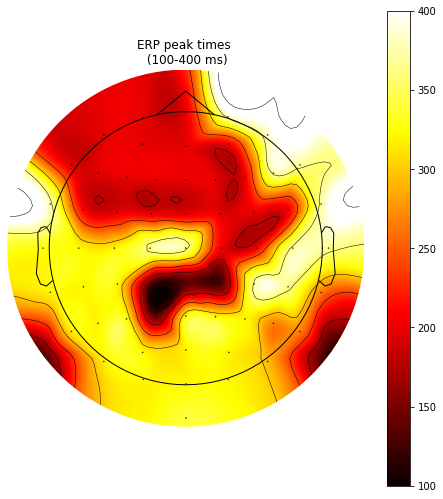

In [7]:
def time_to_id(time2plot):
    # convert time in ms to time in indices
    return np.argmin(np.abs(times - time2plot))

timing_idxs = [time_to_id(100), time_to_id(400)]
erp = np.mean(eeg, axis=2)
erp = erp[:, timing_idxs[0] : timing_idxs[1]]
peak_erp_idxs = np.argmax(erp, axis=1)
peak_erp_idxs.shape


peak_times = times[timing_idxs[0] : timing_idxs[1]][peak_erp_idxs]

topoPlotIndie(data, peak_times,'ERP peak times \n (100-400 ms)', (100,400), 'hot')

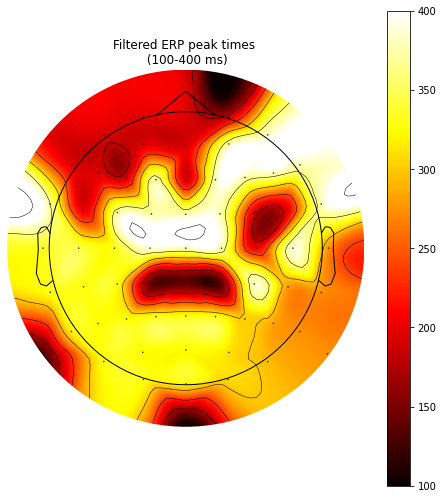

In [8]:
erp = np.mean(eeg, axis=2)
# first low-pass filter (windowed sinc function)
lowcut = 15
filttime = np.arange(-.3, .3, 1/srate)
filtkern = np.sin(2 * np.pi * lowcut * filttime) / filttime
# adjust NaN and normalize filter to unit-gain
filtkern = np.nan_to_num(filtkern, nan=np.max(filtkern))
filtkern = filtkern / np.sum(filtkern)
# windowed sinc filter
filtkern = filtkern * np.hanning(len(filttime))

ferp = filtfilt(filtkern,1,erp);

ferp = ferp[:, timing_idxs[0] : timing_idxs[1]]
peak_ferp_idxs = np.argmax(ferp, axis=1)


peak_times = times[timing_idxs[0] : timing_idxs[1]][peak_ferp_idxs]

topoPlotIndie(data, peak_times,'Filtered ERP peak times \n (100-400 ms)', (100,400), 'hot')

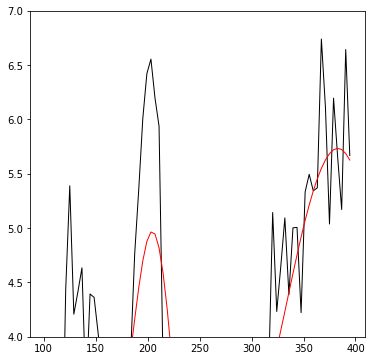

In [15]:
chan = 47
fig, ax = plt.subplots(figsize=(6,6))
erp = erp[:, timing_idxs[0] : timing_idxs[1]]
ax.plot(times[timing_idxs[0] : timing_idxs[1]], erp[chan], 'k', linewidth=1)
ax.plot(times[timing_idxs[0] : timing_idxs[1]], ferp[chan], 'r', linewidth=1)
ax.set_ylim((4,7))
plt.show()